캐글에 올릴 csv파일 만드는데 있어서 고민 
어떻게 test데이터의 결측치를 처리하고 csv파일을 생성할것인가
데이터 정리

In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import re
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

train_data = pd.read_csv("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/csv_file/train.csv")
test_data = pd.read_csv("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/csv_file/test.csv")

# 먼저 결측치 확인 
train_data.isna().sum()

# 결측치를 해당 컬럼의 평균으로 대체
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].mean())
test_data["Age"] = test_data["Age"].fillna(test_data["Age"].mean())

# 라벨인코더를 위해서 data에서 pop
name = train_data.pop("Name")
sex = train_data.pop("Sex")
embarked = train_data.pop("Embarked")

# survived같은 경우는 슬라이싱 하기가 좀 불편해서 잘라내고 
# 마지막 컬럼으로 위치 이동
survived_cloen = train_data.pop("Survived")

# ticket같은 경우도 문자열과 혼합이 되어있기때문에 
# 마지막 숫자만 끌어와서 np.array로 변형시켜주고 
# data에 추가시킨다.
ticket_cloen = train_data.pop("Ticket")
ticket_cloen = list(ticket_cloen)

ticket_save = []

for i in ticket_cloen:
    ticket_save.append(i[-1])
save_ticket = np.array(ticket_save)

# cabin같은 경우는 결측치도 많고 슬라이싱도 해주어야 해서 
# fillna함수로 결측치를 삭제시켜주고 첫글자만 슬라이싱을 해줌
# 그리고서 라벨인코딩 후 data에 추가

cabin_save = train_data.pop("Cabin")
cabin_save = cabin_save.fillna(method = "pad")
cabin_save = cabin_save.fillna("C85")

save_cabin = []

for i in range(len(cabin_save)):
    save_cabin.append(cabin_save[i][:1])
cabin_cloen = np.array(save_cabin)

# 라벨 인코딩 시작 
e1 = LabelEncoder()
e1.fit(name)
name = e1.transform(name)

e2 = LabelEncoder()
e2.fit(sex)
sex = e2.transform(sex)

e3 = LabelEncoder()
e3.fit(embarked)
embarked = e3.transform(embarked)

e4 = LabelEncoder()
e4.fit(cabin_cloen)
cabin = e4.transform(cabin_cloen)

e5 = LabelEncoder()
e5.fit(save_ticket)
ticket = e5.transform(save_ticket)

# 인코딩을 마치고 data에 설정
train_data["Ticket"] = ticket
train_data["Cabin"] = cabin
train_data["Name"] = name
train_data["Sex"] = sex
train_data["Embarked"] = embarked
train_data["Survived"] = survived_cloen

# 데이터의 밸류들만 가져와서 dataset 변수에 저장 
# 아래 구문부터는 너무나도 익숙한 케라스의 기본 모델이기때문에
# 자세한 설명은 하지않겠음
dataset = train_data.values
x_data = dataset[: , :11]
y = dataset[: , 11]

y_data = tf.keras.utils.to_categorical(y)

In [31]:
train_data = pd.read_csv("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/csv_file/train.csv")
test_data = pd.read_csv("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/csv_file/test.csv")

# 먼저 결측치 확인 
# train_data.isna().sum()

# 결측치를 해당 컬럼의 평균으로 대체
# train_data["Age"] = train_data["Age"].fillna(train_data["Age"].mean())
test_data["Age"] = test_data["Age"].fillna(test_data["Age"].mean())

# 라벨인코더를 위해서 data에서 pop
name_test = test_data.pop("Name")
sex_test = test_data.pop("Sex")
embarked_test = test_data.pop("Embarked")

ticket_cloen_test = test_data.pop("Ticket")
ticket_cloen_test = list(ticket_cloen_test)

ticket_save_test = []

for i in ticket_cloen_test:
    ticket_save_test.append(i[-1])
save_ticket_test = np.array(ticket_save_test)

# cabin같은 경우는 결측치도 많고 슬라이싱도 해주어야 해서 
# fillna함수로 결측치를 삭제시켜주고 첫글자만 슬라이싱을 해줌
# 그리고서 라벨인코딩 후 data에 추가

cabin_save_test = test_data.pop("Cabin")
cabin_save_test = cabin_save_test.fillna(method = "pad")
cabin_save_test = cabin_save_test.fillna("C85")

save_cabin_test = []

for i in range(len(cabin_save_test)):
    save_cabin_test.append(cabin_save_test[i][:1])
cabin_cloen_test = np.array(save_cabin_test)

e1 = LabelEncoder()
e1.fit(name_test)
name_test_data = e1.transform(name_test)

e2 = LabelEncoder()
e2.fit(sex_test)
sex_test = e2.transform(sex_test)

e3 = LabelEncoder()
e3.fit(embarked_test)
embarked_test = e3.transform(embarked_test)

e4_test = LabelEncoder()
e4_test.fit(cabin_cloen_test)
cabin_test = e4_test.transform(cabin_cloen_test)

e5_test = LabelEncoder()
e5_test.fit(save_ticket_test)
ticket_test = e5.transform(save_ticket_test)

test_data["Ticket"] = ticket_test
test_data["Cabin"] = cabin_test
test_data["Name"] = name_test_data
test_data["Sex"] = sex_test
test_data["Embarked"] = embarked_test
test_data["Fare"] = test_data["Fare"].fillna(test_data["Fare"].mean())

dataset_test = test_data.values
x_test_data = dataset_test[: , :11]

x_train , x_test , y_train , y_test = train_test_split(x_data , y_data, test_size = 0.3 , random_state = seed)

Epoch 1/2000
42/42 [==============================] - 1s 14ms/step - loss: 2.1167 - accuracy: 0.5420 - val_loss: 0.7013 - val_accuracy: 0.5680

Epoch 00001: val_loss improved from inf to 0.70131, saving model to ./model_titanic/01-0.5420.hdf5
Epoch 2/2000
42/42 [==============================] - 0s 12ms/step - loss: 0.6875 - accuracy: 0.6067 - val_loss: 0.7033 - val_accuracy: 0.5583

Epoch 00002: val_loss did not improve from 0.70131
Epoch 3/2000
42/42 [==============================] - 0s 12ms/step - loss: 0.6704 - accuracy: 0.6067 - val_loss: 0.7043 - val_accuracy: 0.5728

Epoch 00003: val_loss did not improve from 0.70131
Epoch 4/2000
42/42 [==============================] - 0s 12ms/step - loss: 0.6472 - accuracy: 0.6379 - val_loss: 0.7300 - val_accuracy: 0.5728

Epoch 00004: val_loss did not improve from 0.70131
Epoch 5/2000
42/42 [==============================] - 0s 12ms/step - loss: 0.6359 - accuracy: 0.6499 - val_loss: 0.7450 - val_accuracy: 0.5680

Epoch 00005: val_loss did no

42/42 [==============================] - 0s 12ms/step - loss: 0.5713 - accuracy: 0.7050 - val_loss: 0.6742 - val_accuracy: 0.6699

Epoch 00042: val_loss did not improve from 0.65166
Epoch 43/2000
42/42 [==============================] - 0s 11ms/step - loss: 0.5755 - accuracy: 0.7026 - val_loss: 0.7036 - val_accuracy: 0.5922

Epoch 00043: val_loss did not improve from 0.65166
Epoch 44/2000
42/42 [==============================] - 0s 11ms/step - loss: 0.5979 - accuracy: 0.6715 - val_loss: 0.7227 - val_accuracy: 0.6019

Epoch 00044: val_loss did not improve from 0.65166
Epoch 45/2000
42/42 [==============================] - 0s 11ms/step - loss: 0.6012 - accuracy: 0.7050 - val_loss: 0.6956 - val_accuracy: 0.6068

Epoch 00045: val_loss did not improve from 0.65166
Epoch 46/2000
42/42 [==============================] - 0s 11ms/step - loss: 0.6004 - accuracy: 0.7218 - val_loss: 0.6973 - val_accuracy: 0.6165

Epoch 00046: val_loss did not improve from 0.65166
Epoch 47/2000
42/42 [=============

42/42 [==============================] - 0s 11ms/step - loss: 0.5323 - accuracy: 0.7194 - val_loss: 0.6973 - val_accuracy: 0.6359

Epoch 00083: val_loss did not improve from 0.64205
Epoch 84/2000
42/42 [==============================] - 0s 12ms/step - loss: 0.5484 - accuracy: 0.7218 - val_loss: 0.7500 - val_accuracy: 0.6359

Epoch 00084: val_loss did not improve from 0.64205
Epoch 85/2000
42/42 [==============================] - 0s 12ms/step - loss: 0.5401 - accuracy: 0.7218 - val_loss: 0.6942 - val_accuracy: 0.6408

Epoch 00085: val_loss did not improve from 0.64205
Epoch 86/2000
42/42 [==============================] - 0s 11ms/step - loss: 0.5247 - accuracy: 0.7314 - val_loss: 0.7188 - val_accuracy: 0.6456

Epoch 00086: val_loss did not improve from 0.64205
Epoch 87/2000
42/42 [==============================] - 0s 11ms/step - loss: 0.5298 - accuracy: 0.7242 - val_loss: 0.8418 - val_accuracy: 0.6311

Epoch 00087: val_loss did not improve from 0.64205
Epoch 88/2000
42/42 [=============

42/42 [==============================] - 0s 12ms/step - loss: 0.4804 - accuracy: 0.7650 - val_loss: 0.8679 - val_accuracy: 0.6214

Epoch 00125: val_loss did not improve from 0.64205
Epoch 126/2000
42/42 [==============================] - 0s 11ms/step - loss: 0.4560 - accuracy: 0.7674 - val_loss: 0.8613 - val_accuracy: 0.6456

Epoch 00126: val_loss did not improve from 0.64205
Epoch 127/2000
42/42 [==============================] - 0s 11ms/step - loss: 0.4982 - accuracy: 0.7434 - val_loss: 1.0251 - val_accuracy: 0.6359

Epoch 00127: val_loss did not improve from 0.64205
Epoch 128/2000
42/42 [==============================] - 0s 12ms/step - loss: 0.4940 - accuracy: 0.7674 - val_loss: 0.8931 - val_accuracy: 0.6359

Epoch 00128: val_loss did not improve from 0.64205
Epoch 129/2000
42/42 [==============================] - 0s 11ms/step - loss: 0.4578 - accuracy: 0.7722 - val_loss: 0.9247 - val_accuracy: 0.6553

Epoch 00129: val_loss did not improve from 0.64205
Epoch 130/2000
42/42 [========


Epoch 00166: val_loss did not improve from 0.64205
Epoch 167/2000
42/42 [==============================] - 0s 11ms/step - loss: 0.4194 - accuracy: 0.7890 - val_loss: 1.1202 - val_accuracy: 0.6214

Epoch 00167: val_loss did not improve from 0.64205
Epoch 168/2000
42/42 [==============================] - 0s 12ms/step - loss: 0.4112 - accuracy: 0.7866 - val_loss: 1.1029 - val_accuracy: 0.5971

Epoch 00168: val_loss did not improve from 0.64205
Epoch 169/2000
42/42 [==============================] - 0s 12ms/step - loss: 0.4877 - accuracy: 0.7578 - val_loss: 1.1419 - val_accuracy: 0.6699

Epoch 00169: val_loss did not improve from 0.64205
Epoch 170/2000
42/42 [==============================] - 0s 11ms/step - loss: 0.5830 - accuracy: 0.7578 - val_loss: 0.7276 - val_accuracy: 0.6553

Epoch 00170: val_loss did not improve from 0.64205


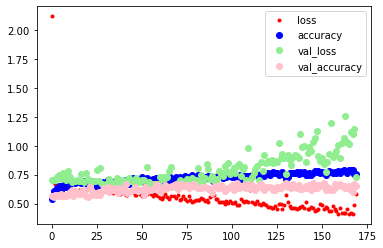

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 30)                360       
_________________________________________________________________
dense_81 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_82 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_83 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_84 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_85 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_86 (Dense)             (None, 30)               

In [33]:
model = Sequential()
model.add(Dense(30 , input_dim = 11 , activation = "relu"))
model.add(Dense(30 , activation = "relu"))
model.add(Dense(30 , activation = "relu"))
model.add(Dense(30 , activation = "relu"))
model.add(Dense(30 , activation = "relu"))
model.add(Dense(30 , activation = "relu"))
model.add(Dense(30 , activation = "relu"))
model.add(Dense(30 , activation = "relu"))
model.add(Dense(30 , activation = "relu"))
model.add(Dense(2 , activation = "softmax"))

model.compile(loss = "categorical_crossentropy" , optimizer = optimizers.Adam(lr = 0.001) , metrics = ["accuracy"])

model_dir = "./model_titanic/"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
modelpath = "./model_titanic/{epoch:02d}-{accuracy:.4f}.hdf5"

checkpoint = ModelCheckpoint(filepath = modelpath , mointor = "val_loss" , verbose = 1 , save_best_only = True)

earlystopping = EarlyStopping(monitor = "val_loss" , patience = 100)

history = model.fit(x_train , y_train , epochs = 2000 , verbose = 1 , batch_size = 10 ,validation_split = 0.33 , callbacks = [checkpoint , earlystopping])

loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

x_len = np.arange(len(val_accuracy))

plt.plot(x_len , loss , "o" , c = "red" , markersize = 3 , label = "loss")
plt.plot(x_len , accuracy , "o" , c = "blue" , label = "accuracy")
plt.plot(x_len , val_loss , "o" , c = "lightgreen" , label = "val_loss")
plt.plot(x_len , val_accuracy , "o" , c = "pink" , label = "val_accuracy")

plt.legend()
plt.show()

model.summary()
print("\nAccuracy %.4f" %(model.evaluate(x_test ,y_test)[1]))


In [34]:
predict = model.predict(x_test_data)
predicted = tf.cast(predict > 0.5 , dtype = tf.int32)
predicted = predicted.numpy()
predicted
# result = pd.DataFrame({"Passengerld" : x_test["Passengerld"],"Survived" : predicted.flatten()})

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1,